In [1]:
# read and analysis the data
import os
import pandas as pd
df = pd.read_csv('../../comparison_of_classifiers.csv')
grouped = df.groupby('classifier')

for name, group in grouped:
    # print(name)
    # print(group.columns.tolist())
    # print(f"{name}: {len(group)} rows")
    print(group[group['class'] == 'Lesions'])
    print("inter")

       class  precision  sensitivity       f1  specificity  accuracy  \
302  Lesions   0.529072     0.529509  0.52929     0.974881  0.952346   

          mcc        dor       TP       FP  ...  decoder_use_batchnorm  \
302  0.504193  43.678628  1917420  1706702  ...                    NaN   

     middleBlocks        loss optimizer learningRate useFP16  useAllGPUs  \
302           NaN  focal_loss      Adam        0.001   False       False   

    time_evaluated  balance only  balance + elastic  
302            NaN          True              False  

[1 rows x 51 columns]
inter
       class  precision  sensitivity        f1  specificity  accuracy  \
305  Lesions   0.633918     0.480396  0.546582     0.985214  0.959671   

          mcc        dor       TP       FP  ...  decoder_use_batchnorm  \
305  0.531441  61.605805  1739575  1004590  ...                    NaN   

     middleBlocks        loss optimizer learningRate useFP16  useAllGPUs  \
305           NaN  focal_loss      Adam     

In [3]:
# Clean-up the outliers in the data. Check the accuracy of the calculations
import numpy as np
import math

def is_equal(a, b):
    tolerance = 1e-3
    if abs(a-b) < tolerance:
        return True
    return False
for name, group in grouped:
    lesions = group[group['class'] == 'Lesions']
    TP = int(lesions['TP'].iloc[0])
    TP = int(lesions['TP'].iloc[0]); TN = int(lesions['TN'].iloc[0]); FP = int(lesions['FP'].iloc[0]); FN = int(lesions['FN'].iloc[0])
    precision = float(lesions['precision'].iloc[0]); sensitivity = float(lesions['sensitivity'].iloc[0]); f1 = float(lesions['f1'].iloc[0]); 
    specificity = float(lesions['specificity'].iloc[0])
    accuracy = float(lesions['accuracy'].iloc[0]); mcc = float(lesions['mcc'].iloc[0]); dor = float(lesions['dor'].iloc[0])
    # print(TP+FP+FN+TN)
    if(TP+FP+FN+TN != 71565312):
        print("not correct samples: " + TP+FP+FN+TN)
    if(TP+FP == 0): 
        print("could result in Nan: "+lesions['classifier'].iloc[0])
        continue
    _precision = TP/(TP+FP)
    if (is_equal(_precision, precision) == False):
        print("Precision not match: " + lesions['classifier'].iloc[0])
    
    if(TP+FN == 0): 
        print("could result in Nan: "+ lesions['classifier'].iloc[0])
        continue
    _sensitivity = TP/(TP+FN)
    if (is_equal(_sensitivity, sensitivity) == False):
        print("_sensitivity not match: " + lesions['classifier'].iloc[0])

    if(2*TP + FP+FN) == 0:
        print("could result in Nan: "+ lesions['classifier'].iloc[0])
        continue
    _f1 = 2*TP / (2*TP+FP+FN)
    if (is_equal(_f1, f1) == False):
        print("f1 not match: " + lesions['classifier'].iloc[0])

    if(TN+FP) == 0:
        print("could result in Nan: "+ lesions['classifier'].iloc[0])
        continue
    _specificity = TN/(TN+FP)
    if (is_equal(_specificity, specificity) == False):
        print("specificity not match: " + lesions['classifier'].iloc[0])

    _accuracy = (TP + TN) / (TP+FP+FN+TN)
    if(is_equal(_accuracy, accuracy) == False):
        print("accuracy not match: " + lesions['classifier'].iloc[0])
        continue

    if(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) == 0):
        print("could result in Nan: "+ lesions['classifier'].iloc[0])
        continue
    _mcc = (TP*TN-FP*FN)/ math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    if (is_equal(_mcc, mcc) == False):
        print("mcc not match: " + lesions['classifier'].iloc[0])

    if((1-specificity)/specificity == 0): 
        print("could result in Nan: "+ lesions['classifier'].iloc[0])
        continue
    _dor = (sensitivity/(1-sensitivity))/ ((1-specificity)/specificity)
    if (is_equal(_dor, dor) == False):
        print("_dot not match: " + lesions['classifier'].iloc[0])

could result in Nan: Heart_Lesions_10x_Static200618_Cons3_AE_FCN8_2020_6_23_16_37_57_258315_850
could result in Nan: Heart_Lesions_10x_Static200618_Cons3_AE_FCN8_2020_6_24_23_45_2_813556_990
could result in Nan: Heart_Lesions_10x_Static200618_Cons3_AE_Inception_2020_7_31_23_13_16_983883_387
could result in Nan: Heart_Lesions_10x_Static200618_Cons3_AE_ResNet50_2020_7_31_23_13_17_13752_301
could result in Nan: Heart_Lesions_10x_Static200618_Cons3_Seg_Model_2020_6_22_15_15_37_356157_225
could result in Nan: Heart_Lesions_10x_Static200618_Cons3_Seg_Model_2020_6_22_15_15_37_371943_334


In [33]:
# basic analysis
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'classifier' column
groups = df.groupby('classifier')

# Create an empty DataFrame to store the results
result = pd.DataFrame()

# Iterate through each group
for name, group in groups:
    # Find rows where 'class' is equal to 'lesions'
    lesions_rows = group[group['class'] == 'Lesions']
    # Append these rows to the result DataFrame
    result = pd.concat([result, lesions_rows], ignore_index=True)

metrics = ['precision', 'sensitivity', 'f1', 'specificity', 'accuracy', 'mcc', 'dor']

for metric in metrics:
    # Sort the result by 'Accuracy'
    result_sorted = result.sort_values(metric, ascending=False)
    
    # Select the top 5 entries by 'Accuracy'
    print(f"top5 {metric} experiments")
    top5 = result_sorted.nlargest(5, metric)
    
    for index, row in top5.iterrows():
        print(str(row['classifier']).ljust(100) + f"   {metric} = " + str(row[metric]))



top5 precision experiments
Heart_Lesions_10x_Static200618_Cons3_AE_FCN16_DO_0.2_AC_1_AG_1_BC_0_ED_0_MN_loss_2020_6_18_21_6        precision = 0.957344416
Heart_Lesions_10x_Static200618_Cons3_AE_ResNet50_DO_0.2_AC_1_AG_1_BC_0_ED_0_MN_loss_2020_6_18_19_57    precision = 0.875945574
Heart_Lesions_10x_Static200618_Cons3_AE_ResNet50_DO_0.2_AC_1_AG_1_BC_0_ED_0_MN_loss_2020_6_18_21_6     precision = 0.867566721
Heart_Lesions_10x_Static200618_Cons3_AE_ResNet50_DO_0.2_AC_1_AG_0_BC_0_ED_0_MN_loss_2020_6_18_19_57    precision = 0.854629179
Heart_Lesions_10x_Static200618_Cons3_AE_ResNet50_DO_0.2_AC_1_AG_1_BC_1_ED_0_MN_loss_2020_6_18_19_57    precision = 0.851266132
top5 sensitivity experiments
Heart_Lesions_10x_Static200618_Cons3_Seg_Model_2020_6_22_15_15_37_356157_130                           sensitivity = 0.823135904
Heart_Lesions_10x_Static200618_Cons3_Seg_Model_2020_6_23_16_50_14_426028_306                           sensitivity = 0.806970762
Heart_Lesions_10x_Static200618_Cons3_Seg_Model_2020

In [26]:
import pandas as pd
df = pd.read_csv('./comparison_of_classifiers.csv')
missing_ratio = df.isnull().sum() / len(df) * 100

# # Calculate the missing ratio for each column
columns_to_drop = missing_ratio[missing_ratio > 50].index

print("Columns with more than 50% missing values:")
print(columns_to_drop)

# delete the columes
df = df.drop(columns=columns_to_drop)

# Identify columns where all values are the same
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Print these columns
print("Columns where all values are the same:")
print(columns_to_drop)

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

df = df.drop(columns=['dropoutFraction', 'classifier', 'numberOfEpochs', 'trainPercent', 'patience', 'elasticDeform', 'augmentation', 'pretrained', 
                      'magLayers', 'balance + elastic', 'augmentColor', "learningRate"])


df = df[df['class'] == 'Lesions']
df = df.drop(columns=['class'])
df = df.rename(columns={'balance only': 'augment_Geometry', 'balanceClasses':'augmentChangeBackground', 'augmentGeometry': 'augmentColor'})
df = df.rename(columns={'augment_Geometry': 'augmentGeometry'})
print(df.columns)
from sklearn.preprocessing import LabelEncoder
    
column_name = 'loss'
df['loss'] = df['loss'].fillna('combo_loss')
label_encoder = LabelEncoder()
df[column_name] = label_encoder.fit_transform(df[column_name])
dic_loss = {}
for class_value, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    dic_loss[encoded_value] = class_value 
    print(f"{class_value}: {encoded_value}")

df['model'] = df['model'].replace('Seg_Model', 'GhostNet1.0')
df['model'] = df['model'].replace('AE_Xception',  'SINet')
df['model'] = df['model'].replace('AE_InceptionV3', 'MobileNet1.0')
df['model'] = df['model'].replace('AE_FCN8',  'GhostNet0.25')
df['model'] = df['model'].replace('AE_FCN16', 'MobileNet0.25')

df.loc[~df['model'].isin(['GhostNet1.0', 'SINet', 'MobileNet1.0', 'GhostNet0.25', 'MobileNet0.25']), 'model'] = None


df['useAllGPUs'] = df['useAllGPUs'].fillna(True)
df['model'] = df['model'].fillna('SINet')
df.to_csv("test.csv")

column_name = 'model'

label_encoder = LabelEncoder()

df[column_name] = label_encoder.fit_transform(df[column_name])
dic_model = {}
for class_value, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    dic_model[encoded_value] = class_value 
    print(f"{class_value}: {encoded_value}")


Columns with more than 50% missing values:
Index(['layerDepth', 'focalLoss', 'filterSize', 'kernelIncrease',
       'normalization', 'model_name', 'backbone_name', 'encoder_freeze',
       'decoder_use_batchnorm', 'middleBlocks', 'time_evaluated'],
      dtype='object')
Columns where all values are the same:
['anno_set', 'metric_type', 'organ', 'magnification', 'validationPercent', 'checkPointAccuracy', 'overlapPredict', 'optimizer', 'useFP16']
Index(['precision', 'sensitivity', 'f1', 'specificity', 'accuracy', 'mcc',
       'dor', 'TP', 'FP', 'FN', 'TN', 'model', 'augmentColor',
       'augmentChangeBackground', 'fixedDataSeed', 'loss', 'useAllGPUs',
       'augmentGeometry'],
      dtype='object')
combo_loss: 0
focal_loss: 1
GhostNet0.25: 0
GhostNet1.0: 1
MobileNet0.25: 2
MobileNet1.0: 3
SINet: 4


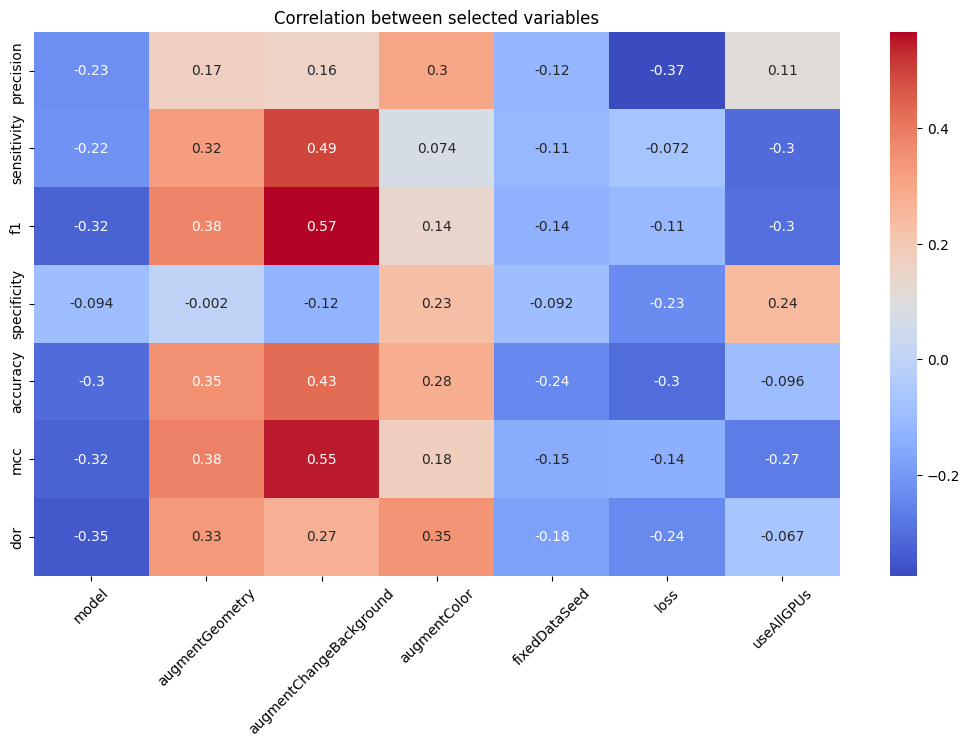

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# drop it first time running this code
# df = df.drop(columns=['classifier'])
# choose x and y axis
y_columns = ['precision', 'sensitivity', 'f1', 'specificity', 'accuracy', 'mcc', 'dor']
x_columns = ['model', 'augmentGeometry', 'augmentChangeBackground',
           'augmentColor', 'fixedDataSeed', 'loss', 'useAllGPUs'
           ]

# calculation
correlation_matrix = df.corr()

selected_correlation_matrix = correlation_matrix.loc[y_columns, x_columns]
fig = plt.figure(figsize=(13, 8))
fig.autofmt_xdate()
# heatmap draw
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)

plt.title('Correlation between selected variables')
plt.savefig("correlation_matrix1.png")
plt.show()


Rows where the correlation with mcc is greater than 0.15 : ['sensitivity', 'f1', 'accuracy', 'mcc']
4
2 2
0 0 0 useAllGPUs sensitivity
1 0 1 useAllGPUs f1
2 1 0 useAllGPUs accuracy
3 1 1 useAllGPUs mcc


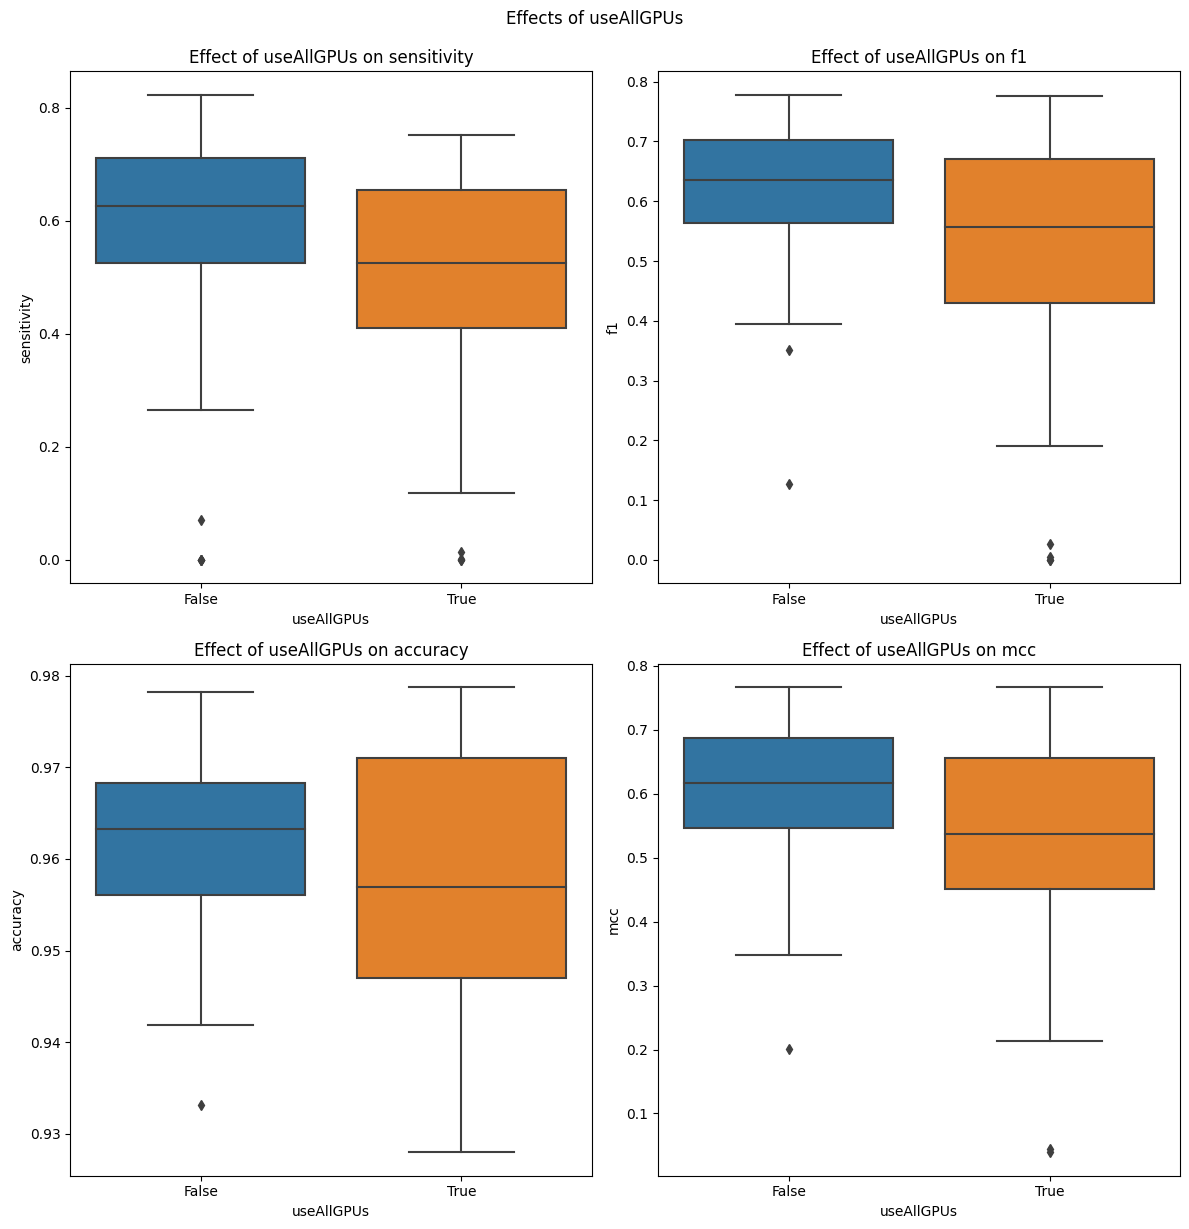

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.15
para1 = 'useAllGPUs'

# get the rows which corr > 0.15
selected_rows = selected_correlation_matrix[abs(selected_correlation_matrix[para1]) > threshold].index

# print the result. 
print("Rows where the correlation with", para2, "is greater than", threshold, ":", selected_rows.tolist())

print(len(selected_rows))
rows = len(selected_rows) // 2
cols = 2

if (len(selected_rows) % 2 != 0):
    rows += 1
print(rows, cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, rows*6))

for index, para2 in enumerate(selected_rows):
    para1_values = df[para1]
    para2_values = df[para2]
    
    row_idx = index // cols
    col_idx = index % cols
    print(index, row_idx, col_idx, para1, para2)

    ax = sns.boxplot(x=para1, y=para2, data=df, ax=axes[row_idx, col_idx])
    # new_Labels = ['combo loss', 'focal loss']
    # ax.set_xticklabels(new_Labels)

    axes[row_idx, col_idx].set_xlabel(para1)
    axes[row_idx, col_idx].set_ylabel(para2)
    axes[row_idx, col_idx].set_title(f'Effect of {para1} on {para2}')

plt.tight_layout()
st = plt.suptitle(t=f"Effects of {para1}", y=1.02)
plt.savefig(f"{para1}_combined_boxplots.png", bbox_extra_artists=[st], bbox_inches='tight')
plt.show()



6
6 1
0 0 0 model precision
1 1 0 model f1
2 2 0 model specificity
3 3 0 model accuracy
4 4 0 model mcc
5 5 0 model dor


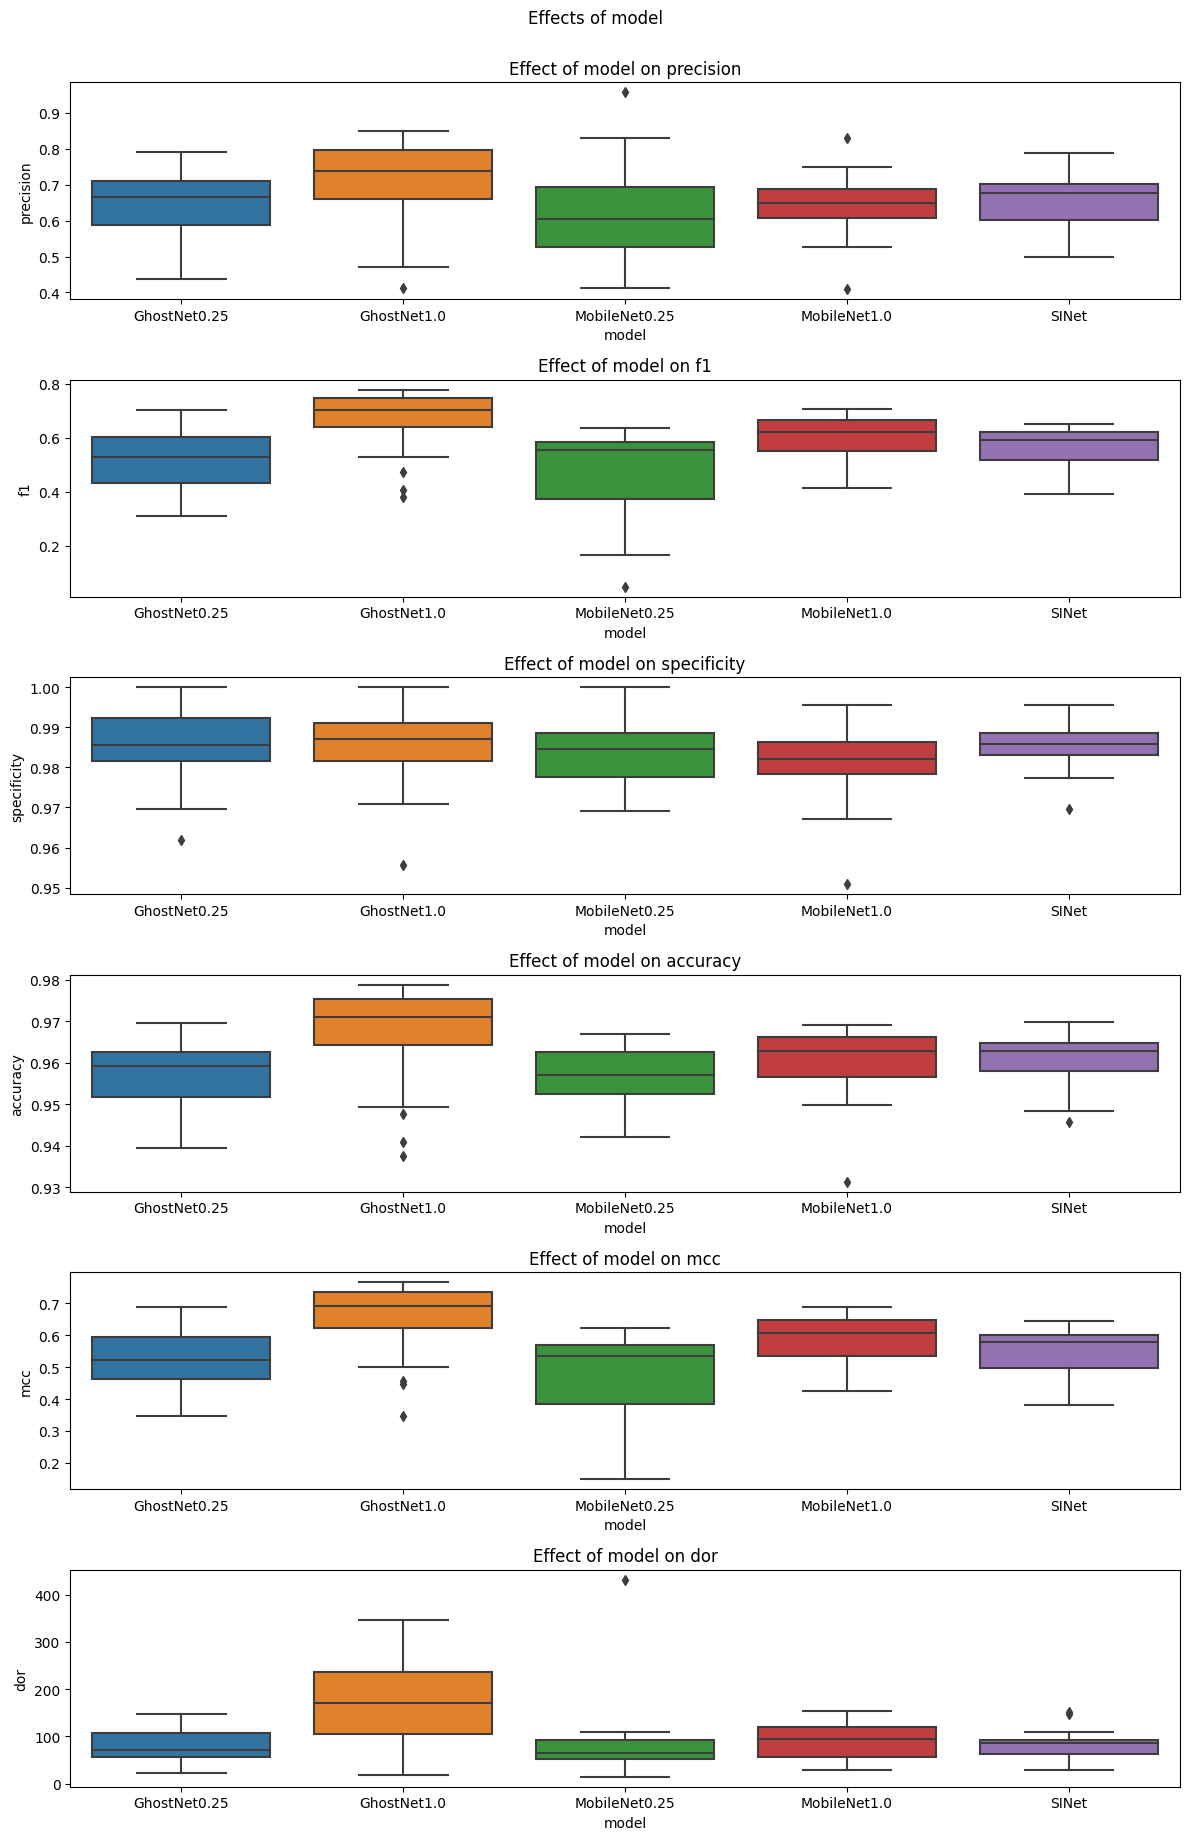

In [53]:
# model draw. The figure is too big 
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.1
para1 = 'model'

# get the rows which corr > 0.15
selected_rows = selected_correlation_matrix[abs(selected_correlation_matrix[para1]) > threshold].index

# print the result. 

print(len(selected_rows))
rows = len(selected_rows) // 1
cols = 1

print(rows, cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, rows*3))

for index, para2 in enumerate(selected_rows):

    para1_values = df[para1]
    para2_values = df[para2]

    row_idx = index // cols
    col_idx = index % cols
    print(index, row_idx, col_idx, para1, para2)

    ax = sns.boxplot(x=para1, y=para2, data=df, ax=axes[row_idx])
    new_Labels = []
    for i in range(5):
        new_Labels.append(dic_model[i])

    ax.set_xticklabels(new_Labels)

    axes[row_idx].set_xlabel(para1)
    axes[row_idx].set_ylabel(para2)
    axes[row_idx].set_title(f'Effect of {para1} on {para2}')

plt.tight_layout()
st = plt.suptitle(t=f"Effects of {para1}", y=1.02)
plt.savefig(f"{para1}_combined_boxplots_1.png", bbox_extra_artists=[st], bbox_inches='tight')
plt.show()



balance: 0
balance, elastic: 1
color: 2
color, balance: 3
color, balance, elastic: 4
color, geo: 5
color, geo, balance: 6
color, geo, balance, elastic: 7
geo: 8
geo, balance: 9
geo, balance, elastic: 10
nan: 11
combo_loss: 0
focal_loss: 1
nan: 2
AE_FCN16: 0
AE_FCN8: 1
AE_Inception: 2
AE_InceptionV3: 3
AE_ResNet50: 4
AE_Xception: 5
DeepLabV3Plus: 6
Seg_Model: 7
12


{0: 'balance', 1: 'balance, elastic', 2: 'color', 3: 'color, balance', 4: 'color, balance, elastic', 5: 'color, geo', 6: 'color, geo, balance', 7: 'color, geo, balance, elastic', 8: 'geo', 9: 'geo, balance', 10: 'geo, balance, elastic', 11: nan}
Rows where the correlation with dor is greater than 0.15 : ['f1', 'mcc', 'dor']
3
2 2
0 0 0 augmentation f1
1 0 1 augmentation mcc
2 1 0 augmentation dor


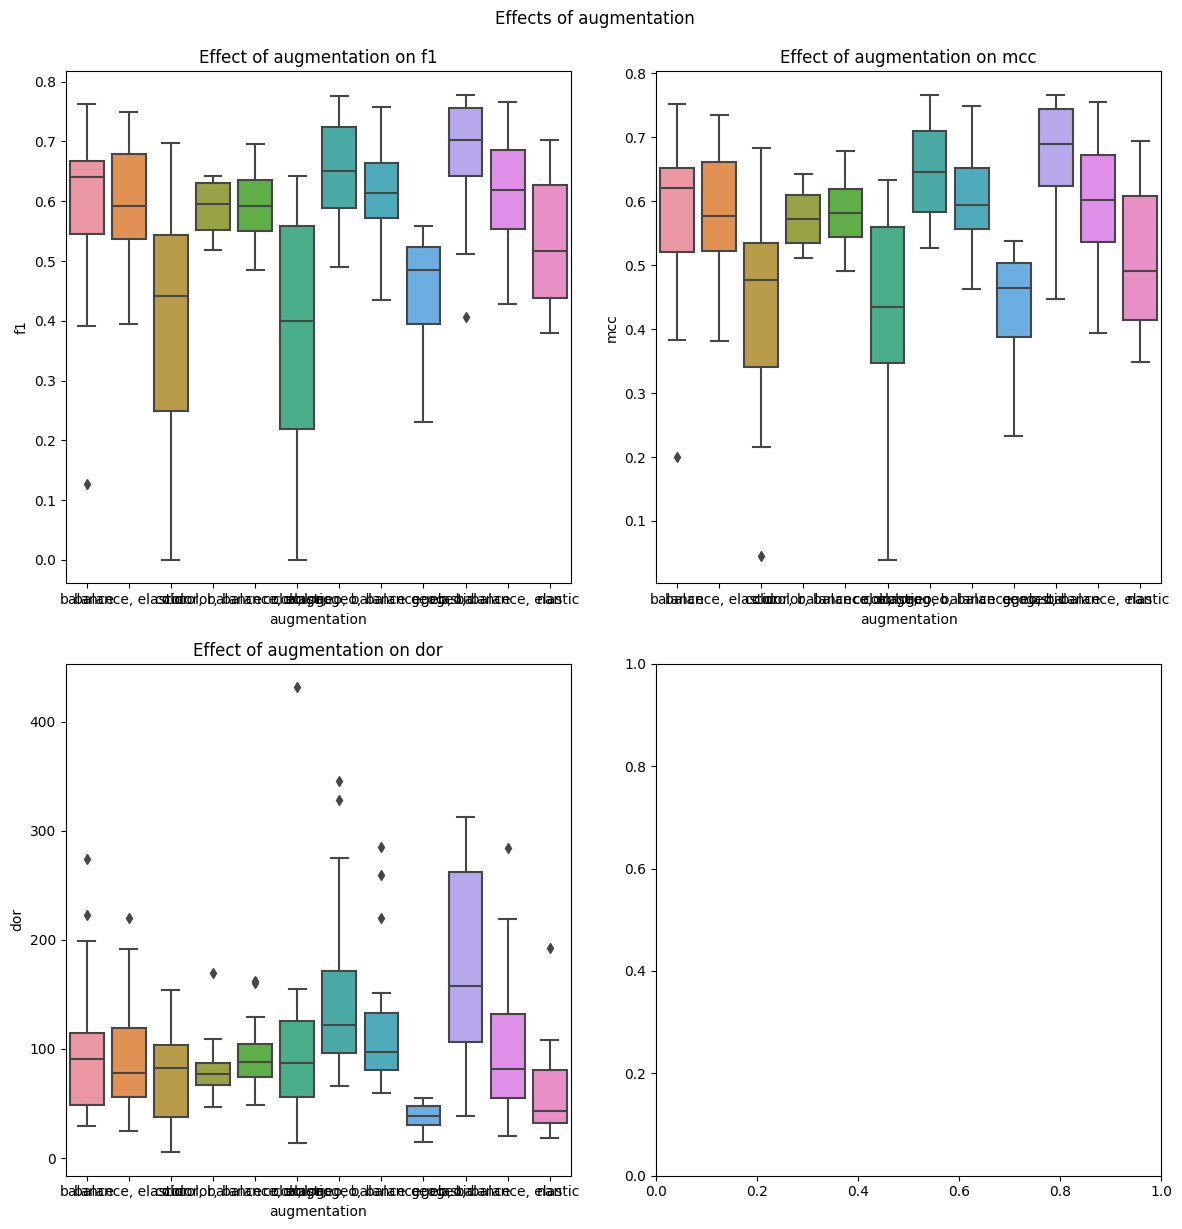

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.15
para1 = 'pretrained'

# get the rows which corr > 0.15
selected_rows = selected_correlation_matrix[abs(selected_correlation_matrix[para1]) > threshold].index

# print the result. 
print("Rows where the correlation with", para2, "is greater than", threshold, ":", selected_rows.tolist())

print(len(selected_rows))
rows = len(selected_rows) // 2
cols = 2

if (len(selected_rows) % 2 != 0):
    rows += 1
print(rows, cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, rows*6))

for index, para2 in enumerate(selected_rows):
    para1_values = df[para1]
    para2_values = df[para2]
    
    row_idx = index // cols
    col_idx = index % cols
    print(index, row_idx, col_idx, para1, para2)

    ax = sns.boxplot(x=para1, y=para2, data=df, ax=axes[row_idx, col_idx])

    axes[row_idx, col_idx].set_xlabel(para1)
    axes[row_idx, col_idx].set_ylabel(para2)
    axes[row_idx, col_idx].set_title(f'Effect of {para1} on {para2}')

plt.tight_layout()
st = plt.suptitle(t=f"Effects of {para1}", y=1.02)
plt.savefig(f"{para1}_combined_boxplots.png", bbox_extra_artists=[st], bbox_inches='tight')
plt.show()



count      263
unique       2
top       True
freq       253
Name: fixedDataSeed, dtype: object
count    263.000000
mean       0.961378
std        0.009836
min        0.927978
25%        0.955671
50%        0.961974
75%        0.967535
max        0.978807
Name: accuracy, dtype: float64
Correlation between fixedDataSeed and accuracy: -0.24180535674650977


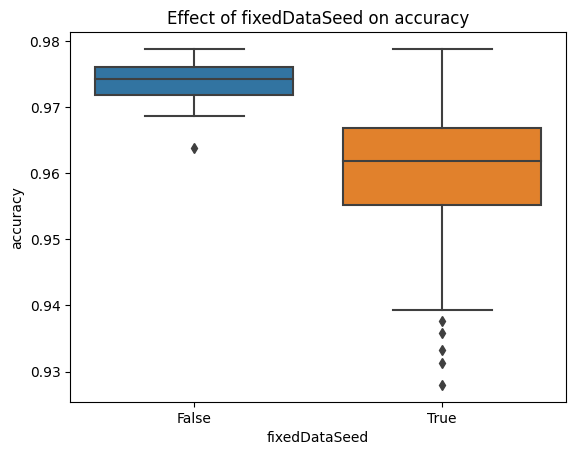

In [270]:
# Correlation
# single plot
para1 = 'fixedDataSeed'
para2 = 'accuracy'
print(df[para1].describe())
print(df[para2].describe())

correlation = df[para1].corr(df[para2])
print(f"Correlation between {para1} and {para2}:", correlation)

ax = sns.boxplot(x=para1, y=para2, data=df)
# new_labels = [dic_loss[0], dic_loss[1], dic_loss[2]]  

# ax.set_xticklabels(new_labels)
plt.xlabel(para1)
plt.ylabel(para2)
plt.title(f'Effect of {para1} on {para2}')
plt.savefig(f"{para1}_{para2}.png")
plt.show()


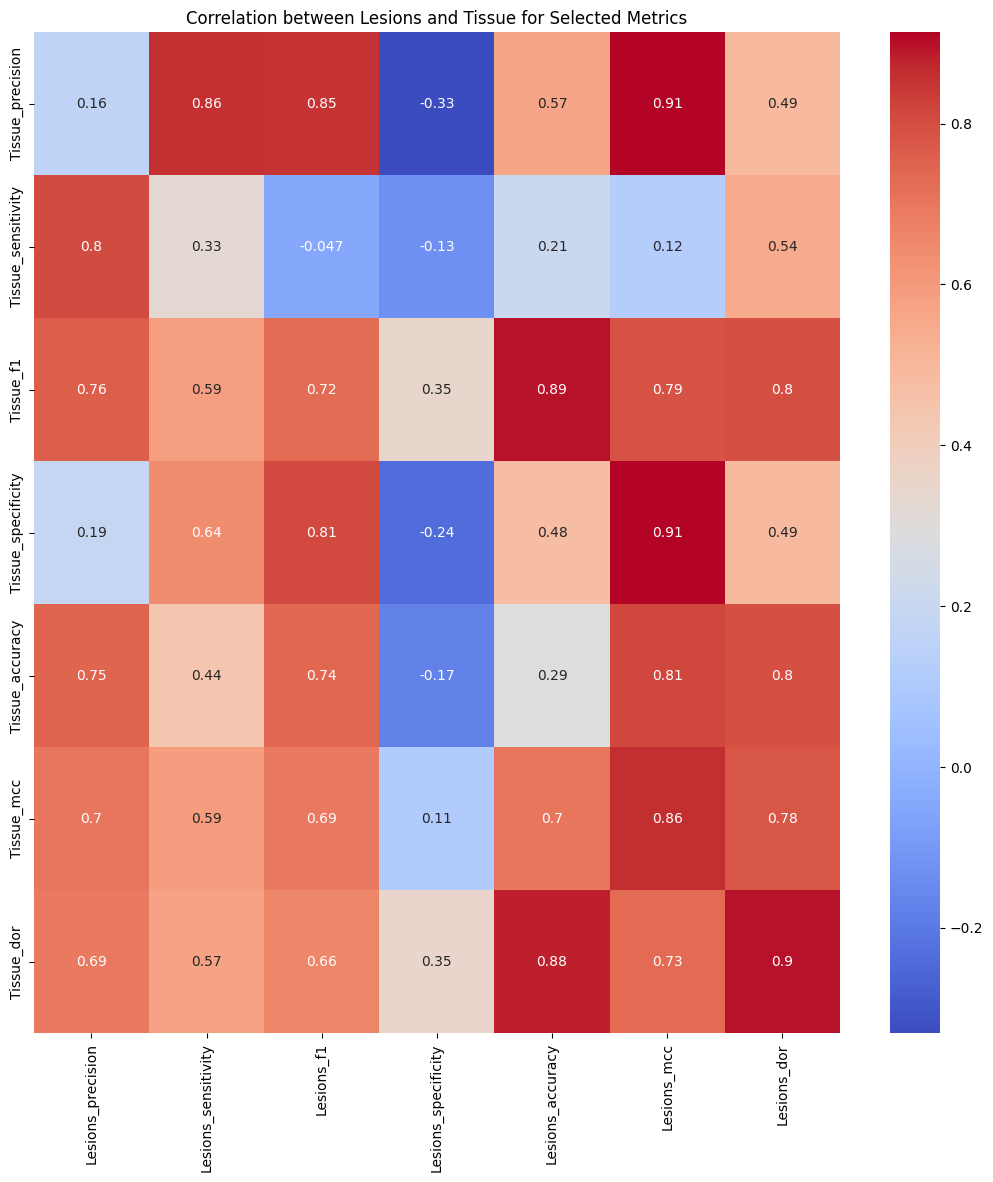

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

draw the correlations of Lesions and Tissue metrics
columns_to_consider = ['precision', 'sensitivity', 'f1', 'specificity', 'accuracy', 'mcc', 'dor'] 

df1 = pd.read_csv('../../comparison_of_classifiers.csv')

correlation_df = pd.DataFrame()

# produce the colume name, copy the value
for column in columns_to_consider:
    for class_name in ['Lesions', 'Tissue']:
        values = df1[df1['class'] == class_name][column]
        new_column_name = f"{class_name}_{column}"
        correlation_df[new_column_name] = values.values


# correlation calculation
correlation_matrix = correlation_df.corr()

lesions_columns = [f"Lesions_{col}" for col in columns_to_consider]
tissue_columns = [f"Tissue_{col}" for col in columns_to_consider]
filtered_correlation_matrix = correlation_matrix.loc[tissue_columns, lesions_columns]

# heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Lesions and Tissue for Selected Metrics')
plt.savefig("correlation_lesions_tissues.png")
plt.show()



Rows where the correlation with dor is greater than 0.15 : ['precision', 'sensitivity', 'f1', 'accuracy', 'mcc', 'dor']
6
6 1
0 0 0 model precision
1 1 0 model sensitivity
2 2 0 model f1


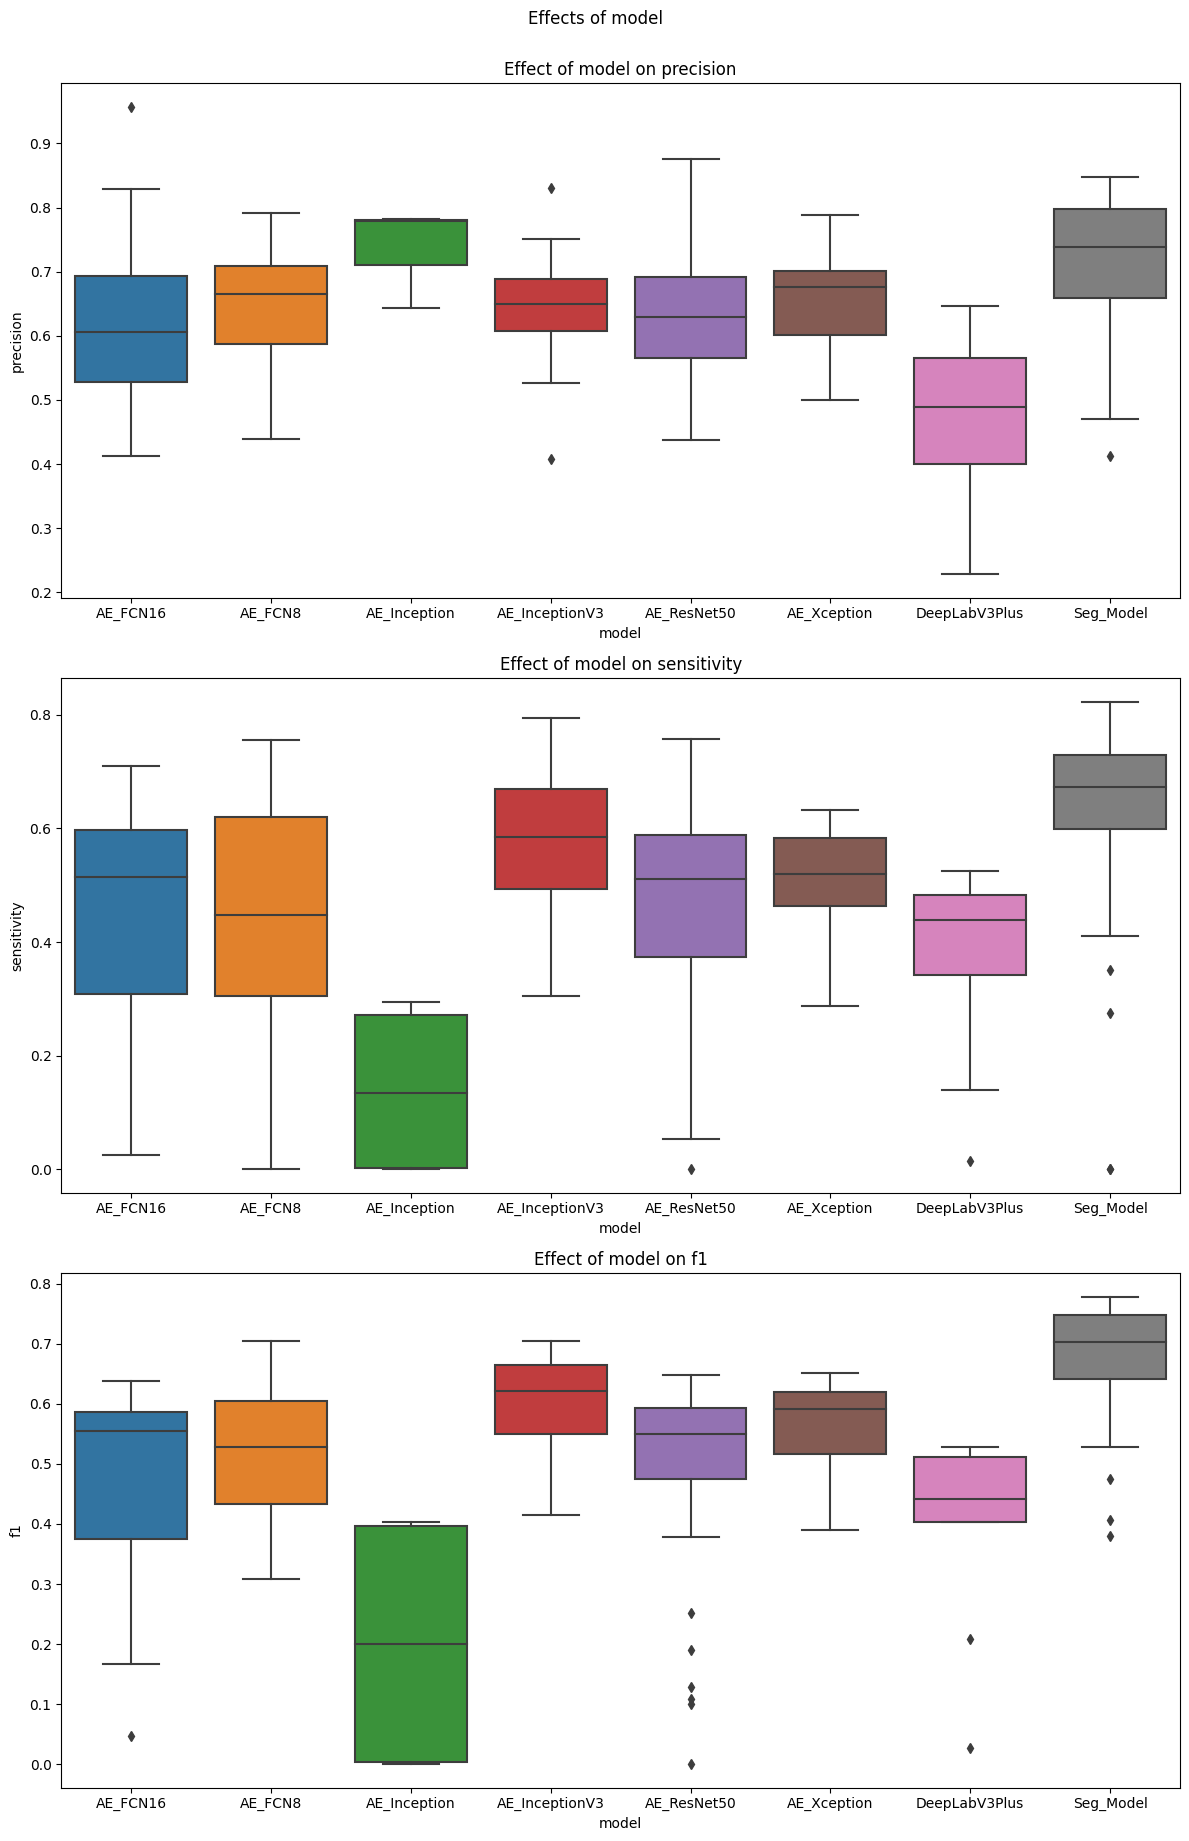

In [307]:
# model draw. The figure is too big 
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.15
para1 = 'model'

# get the rows which corr > 0.15
selected_rows = selected_correlation_matrix[abs(selected_correlation_matrix[para1]) > threshold].index

# print the result. 
print("Rows where the correlation with", para2, "is greater than", threshold, ":", selected_rows.tolist())

print(len(selected_rows))
rows = len(selected_rows) // 1
cols = 1

print(rows, cols)
fig, axes = plt.subplots(3, cols, figsize=(12, rows*3))

for index, para2 in enumerate(selected_rows):
    if index > 2:
        continue
    para1_values = df[para1]
    para2_values = df[para2]
    # index = index - 3
    row_idx = index // cols
    col_idx = index % cols
    print(index, row_idx, col_idx, para1, para2)

    ax = sns.boxplot(x=para1, y=para2, data=df, ax=axes[row_idx])
    new_Labels = []
    for i in range(8):
        new_Labels.append(dic_model[i])

    ax.set_xticklabels(new_Labels)

    axes[row_idx].set_xlabel(para1)
    axes[row_idx].set_ylabel(para2)
    axes[row_idx].set_title(f'Effect of {para1} on {para2}')

plt.tight_layout()
st = plt.suptitle(t=f"Effects of {para1}", y=1.02)
plt.savefig(f"{para1}_combined_boxplots_1.png", bbox_extra_artists=[st], bbox_inches='tight')
plt.show()



Rows where the correlation with dor is greater than 0.15 : ['f1', 'mcc', 'dor']
3
3 1
0 0 0 augmentation f1
0
1 1 0 augmentation mcc
1
2 2 0 augmentation dor
2
yes


<Figure size 640x480 with 0 Axes>

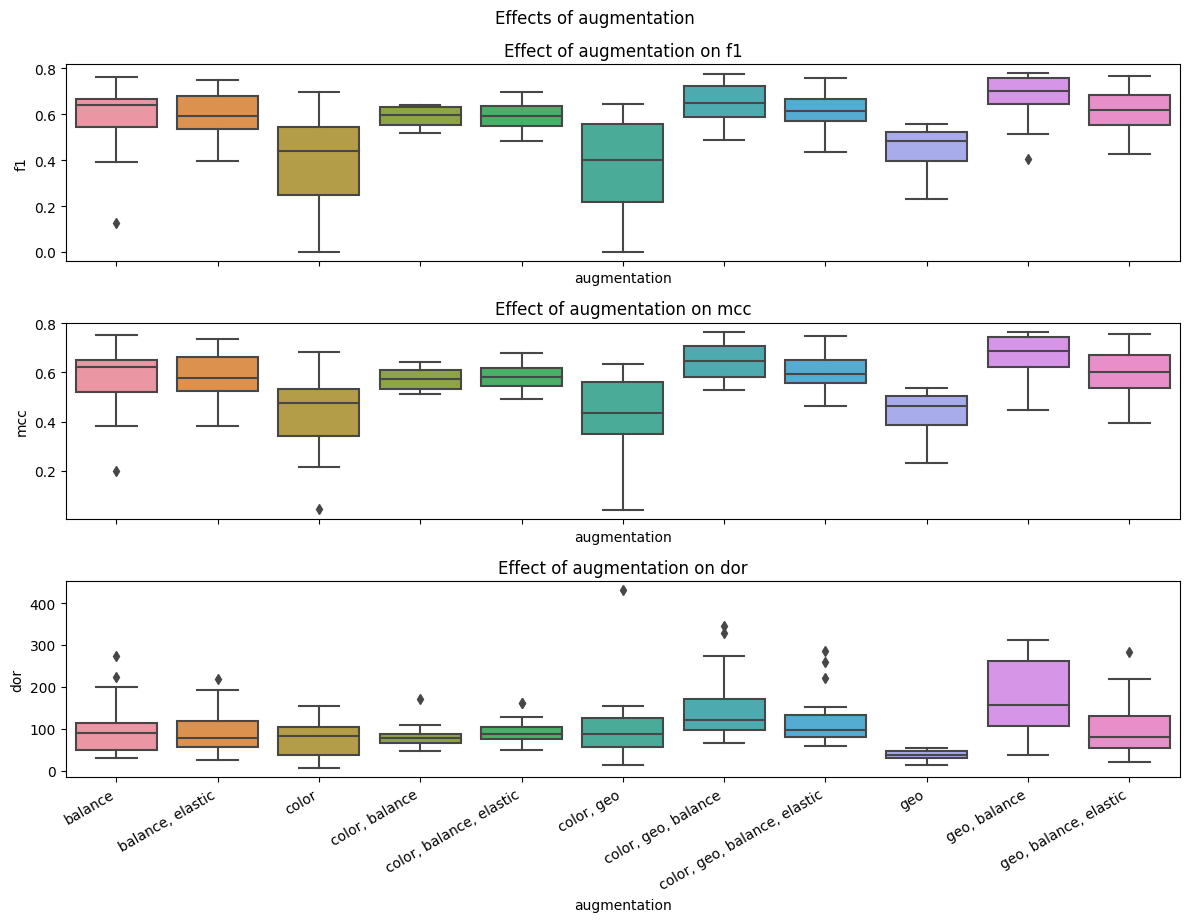

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
# augmentation draw
threshold = 0.15
para1 = 'augmentation'

# get the rows which corr > 0.15
selected_rows = selected_correlation_matrix[abs(selected_correlation_matrix[para1]) > threshold].index

# print the result. 
print("Rows where the correlation with", para2, "is greater than", threshold, ":", selected_rows.tolist())

print(len(selected_rows))
rows = len(selected_rows) // 1
cols = 1

print(rows, cols)
fig = plt.figure()
fig, axes = plt.subplots(3, cols, figsize=(12, rows*3))
fig.autofmt_xdate()



for index, para2 in enumerate(selected_rows):
    if index > 2:
        continue
    para1_values = df[para1]
    para2_values = df[para2]
    # index = index - 3
    row_idx = index // cols
    col_idx = index % cols
    print(index, row_idx, col_idx, para1, para2)

    ax = sns.boxplot(x=para1, y=para2, data=df, ax=axes[row_idx])
    new_Labels = []
    for i in range(11):
        new_Labels.append(dic_augmentation[i])

    ax.set_xticklabels(new_Labels)
    print(row_idx)
    if row_idx == 2:
        print("yes")
        axes[row_idx].set_xlabel(para1)
    axes[row_idx].set_ylabel(para2)
    axes[row_idx].set_title(f'Effect of {para1} on {para2}')
plt.tight_layout()
st = plt.suptitle(t=f"Effects of {para1}", y=1.02)
plt.savefig(f"{para1}_combined_boxplots.png", bbox_extra_artists=[st], bbox_inches='tight')
plt.show()


In [130]:
import math
miou, TP, FP, FN, TN = 88.37942070950172, 308136489, 28706725, 4159801, 308136489
# miou, TP, FP, FN, TN = 86.50489582715846, 306637033, 31475675, 5553124, 306637033
# miou, TP, FP, FN, TN = 85.72334643141824, 306087963, 33941155, 6066204, 306087963

_precision = TP/(TP+FP)

_sensitivity = TP/(TP+FN)

_f1 = 2*TP / (2*TP+FP+FN)

_specificity = TN/(TN+FP)

_accuracy = (TP + TN) / (TP+FP+FN+TN)

_mcc = (TP*TN-FP*FN)/ math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

_dor = (_sensitivity/(1-_sensitivity))/ ((1-_specificity)/_specificity)

print(_precision, _sensitivity, _f1, _specificity,_accuracy,  _mcc, _dor)

MobileNet 27.86 MMac 401.11 k
GhostNet 20.61 MMac 141.29 k
SINet 12.55 MMac  15.1k 


0.9147771906724533 0.9866799538348663 0.949369086617782 0.9147771906724533 0.949369086617782 0.9014571445073195 795.1151996444042
